In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\lenovo\Downloads\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<AxesSubplot:>

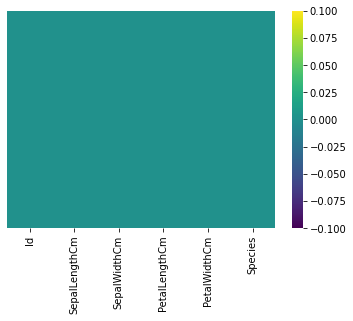

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [7]:
df.shape

(150, 6)

In [8]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
df=df.replace(to_replace='Iris-setosa', value=0)
df=df.replace(to_replace='Iris-virginica', value=1)
df=df.replace(to_replace='Iris-versicolor', value=2)

In [11]:
df['Species'].value_counts()

0    50
2    50
1    50
Name: Species, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [13]:
X=df.iloc[:,1:-1]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
Y=df.iloc[:,-1:]
Y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# USING GINI INDEX

In [16]:
giniindex=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=3,random_state=100)

#TESTING DATA 

In [21]:
giniindex.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=100)

In [22]:
y_pred=giniindex.predict(X_test)
y_pred

array([2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [23]:
confusion_matrix(Y_test,y_pred)

array([[10,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  9]], dtype=int64)

In [24]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# using entropy

In [25]:
entropy_deci=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=3,random_state=100)

In [26]:
entropy_deci.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=100)

In [27]:
y_pred_entropy=entropy_deci.predict(X_test)

In [28]:
confusion_matrix(Y_test,y_pred_entropy)

array([[10,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  9]], dtype=int64)

In [30]:
 print(classification_report(Y_test,y_pred_entropy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [31]:
from sklearn import tree

[Text(0.3181818181818182, 0.9, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 39, 41]'),
 Text(0.22727272727272727, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.4090909090909091, 0.7, 'X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 39, 41]'),
 Text(0.18181818181818182, 0.5, 'X[0] <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.09090909090909091, 0.3, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2727272727272727, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]'),
 Text(0.6363636363636364, 0.5, 'X[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 38, 5]'),
 Text(0.45454545454545453, 0.3, 'X[2] <= 5.05\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.36363636363636365, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.5454545454545454, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(0.8181818181818182, 0.3, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.7272727272727

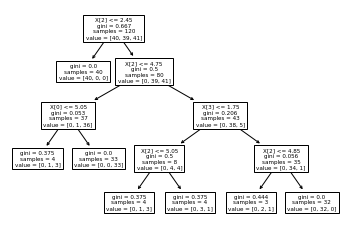

In [33]:
tree.plot_tree(giniindex)

[Text(0.3181818181818182, 0.9, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 39, 41]'),
 Text(0.22727272727272727, 0.7, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.4090909090909091, 0.7, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 39, 41]'),
 Text(0.18181818181818182, 0.5, 'X[0] <= 5.05\nentropy = 0.179\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.09090909090909091, 0.3, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2727272727272727, 0.3, 'entropy = 0.0\nsamples = 33\nvalue = [0, 0, 33]'),
 Text(0.6363636363636364, 0.5, 'X[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 38, 5]'),
 Text(0.45454545454545453, 0.3, 'X[2] <= 5.05\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.36363636363636365, 0.1, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.5454545454545454, 0.1, 'entropy = 0.811\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(0.8181818181818182, 0.3, 'X[2] <= 4.85\nentropy = 0.187\nsamples = 35\nvalue = [0

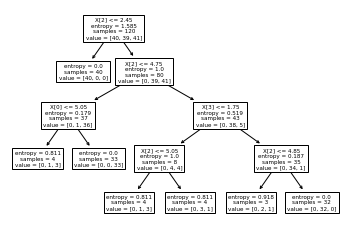

In [34]:
tree.plot_tree(entropy_deci)